In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

Przykład krzywej ROC dla rożnych granic decyzyjnych.

In [2]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

In [3]:
from sklearn.datasets import make_blobs

centers = [(2.3, 0), (0, 2.3)]
X, y = make_blobs(n_samples=100, centers=centers, shuffle=False, random_state=42)

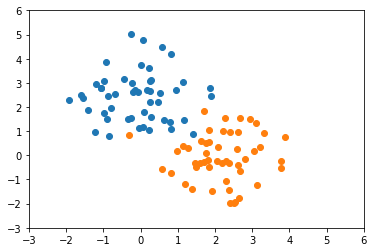

In [4]:
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "o")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "o")
plt.xlim([-3, 6])
plt.ylim([-3, 6])
# plt.axis("equal")
plt.show()


In [5]:
class fixed_plan(object):
    """
    """
    def __init__(self, a=0.5, b=0):
        self.a=a
        self.b=b

        self.A=-self.a
        self.B=1
        self.C=-self.b

    def fit(self, X, y):
        return self
    
    def predict(self, X):
        """Return class label after unit step"""
        y_cl=np.sign(np.dot( X, np.array([self.A,self.B]))+self.C)
        y_cl[y_cl==-1]=0
        return y_cl
    def decision_function(self, X):
        """Return distance to classification boundary"""
        y_cl=np.dot( X, np.array([self.A,self.B]))+self.C
        return ( y_cl )        

In [6]:
from mlxtend.plotting import plot_decision_regions
from sklearn import  metrics

y[y==0]=-1

models = []
models.append(('Model 1', fixed_plan(a=-1,b=2)))
# models.append(('Model 1', fixed_plan(a=-1,b=3)))
models.append(('Model 2', fixed_plan(a=2,b=2)))
models.append(('Model 2', fixed_plan(a=1,b=-1)))
models.append(('Model 2', fixed_plan(a=100,b=-100)))
# models.append(('SVM', LinearSVC(random_state=0, tol=1e-5)))


Model 1


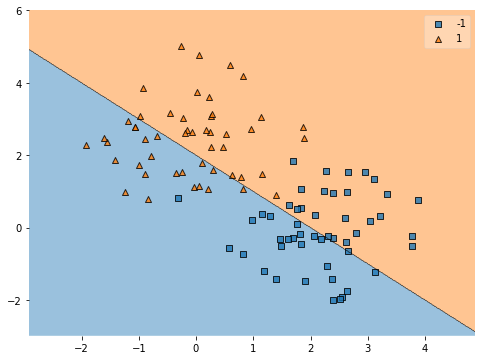

0.5511999999999999


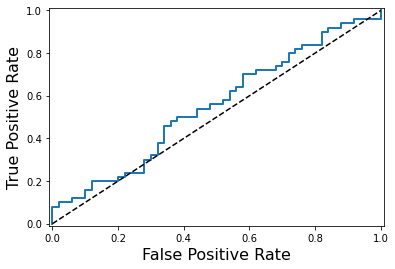

Model 2


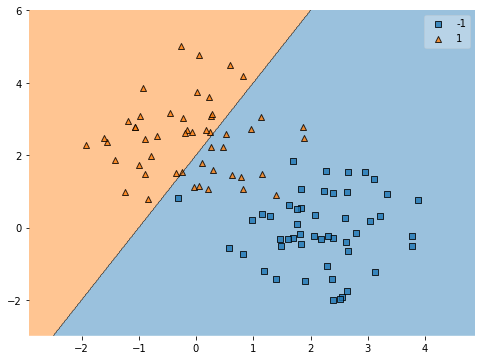

0.9932000000000001


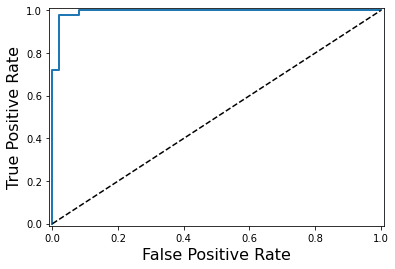

Model 2


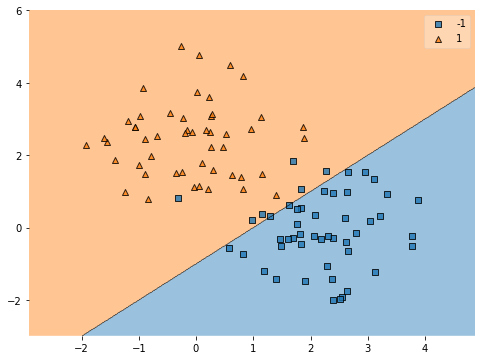

0.996


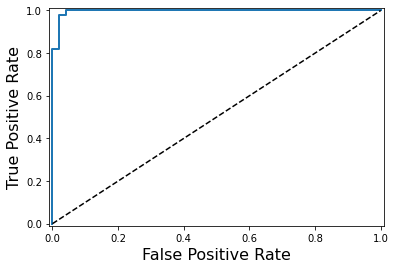

Model 2


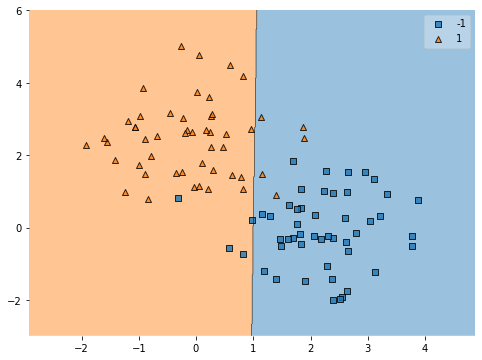

0.9652000000000001


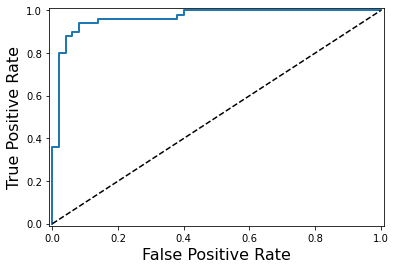

In [7]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1.01, -0.01, 1.01])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)


for name, model in models:
    print(name)
    model.fit(X,y)
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X, y, model)
    plt.show()
    
    y_scores = model.decision_function(X) 
    fpr, tpr, thresholds = roc_curve(y, y_scores)
    plot_roc_curve(fpr, tpr, name)
    print(metrics.roc_auc_score(y, y_scores))

#     plt.legend(loc="lower right", fontsize=16)
    plt.show()
    
    